In [23]:
%matplotlib inline

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import re

In [25]:
# get loandata
loansData = pd.read_csv('https://spark-public.s3.amazonaws.com/dataanalysis/loansData.csv')

In [26]:
# clean interest rate using regex - ability to replace so df objects are mutable
loansData['Interest.Rate'] = [float(re.search('^[0-9]*.[0-9]*',loan).group(0))/100 for loan in loansData['Interest.Rate']]


In [27]:
loansData['Interest.Rate'][:5]

81174    0.0890
99592    0.1212
80059    0.2198
15825    0.0999
33182    0.1171
Name: Interest.Rate, dtype: float64

In [28]:
# clean fico range and get score 
loansData['FICO.Score'] = map(lambda x: int(x.split('-')[0]), loansData['FICO.Range'])

In [29]:
loansData['FICO.Score'][:5]

81174    735
99592    715
80059    690
15825    695
33182    695
Name: FICO.Score, dtype: int64

In [1]:
loansData['Amount.Requested'][:5]

NameError: name 'loansData' is not defined

In [31]:
# extract the columns from the data frame returning a series
intrate = loansData['Interest.Rate']
loanamt = loansData['Amount.Requested']
fico = loansData['FICO.Score']

In [32]:
# reshape the data
# The dependent variable
y = np.matrix(intrate).transpose()
# The independent variables shaped as columns
x1 = np.matrix(fico).transpose()
x2 = np.matrix(loanamt).transpose()

In [33]:
# put the columns back together to create a matrix
x = np.column_stack([x1,x2])

In [34]:
x.shape

(2500L, 2L)

In [35]:
# create the linear model with statsmodels - # read more about stats models
X = sm.add_constant(x)
model = sm.OLS(y,X)
f = model.fit()

In [36]:
# show the output
# ********************************************* ask Kyle about the minor differences float vs int - rounding precision sig digits
f.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     2388.
Date:                Tue, 09 Feb 2016   Prob (F-statistic):               0.00
Time:                        19:20:19   Log-Likelihood:                 5727.6
No. Observations:                2500   AIC:                        -1.145e+04
Df Residuals:                    2497   BIC:                        -1.143e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.7288      0.010     73.734      0.000         0.709     0.748
x1            -0.0009    1.4e-05    -63.022      0.000        -0.001    -0.001
x2          2.107e-06    6.3e-08     33.443      0.000      1.98e-06  2.23e-06
==============================================================================
Omnibus:                       69.496   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.811
Skew:                           0.379   Prob(JB):                     1.27e-17
Kurtosis:                       3.414   Cond. No.                     2.96e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.96e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
f.params

array([  7.28827983e-01,  -8.84424222e-04,   2.10747769e-06])

In [38]:
my_y =[2,10]

In [39]:
my_x = [4,20]

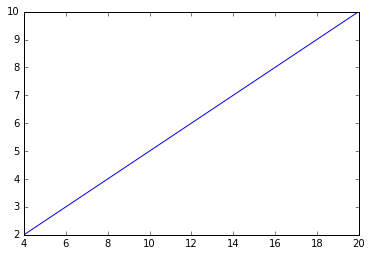

In [40]:
plt.plot(my_x,my_y)

IndexError: indices are out-of-bounds

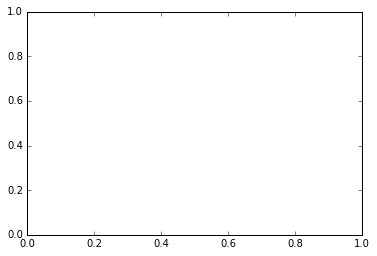

In [42]:
loansData.plot(kind='scatter', x=loansData['FICO.Score'], y=loansData['Interest.Rate'],color='DarkBlue')

In [43]:
loansData.head

<bound method DataFrame.head of         Amount.Requested  Amount.Funded.By.Investors  Interest.Rate  \
81174              20000                    20000.00         0.0890   
99592              19200                    19200.00         0.1212   
80059              35000                    35000.00         0.2198   
15825              10000                     9975.00         0.0999   
33182              12000                    12000.00         0.1171   
62403               6000                     6000.00         0.1531   
48808              10000                    10000.00         0.0790   
22090              33500                    33450.00         0.1714   
76404              14675                    14675.00         0.1433   
15867               7000                     7000.00         0.0691   
94971               2000                     2000.00         0.1972   
36911              10625                    10625.00         0.1427   
41200              28000                    2

In [ ]:
ax = loansData.plot(kind='scatter', x=intrate, y=fico,color='DarkBlue', label='Group 1')

In [ ]:
# fig, ax = plt.subplots()
# >>> fig = sm.graphics.plot_fit(results, 0, ax=ax)
# >>> ax.set_ylabel("Murder Rate")
# >>> ax.set_xlabel("Poverty Level")
# >>> ax.set_title("Linear Regression")

# fig, ax = plt.subplots()
# fig = sm.graphics.plot_fit(f, 0 , ax = ax)
# ax.set_ylabel("FICO Score")
# ax.set_xlabel("Interest Rate")
# ax.set_title("Linear Regression")

In [ ]:
df = pd.read(x)